# Research Summary for June 6th 2023

## Imports

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

def genPlot(fname,df,l):
    plt.plot(df["time"],df["fidelity"],'o-')
    plt.xlabel("T/Tmin")
    plt.ylabel("Fidelity")
    plt.title(fname)
    plt.grid(which='major', linestyle='-', linewidth='0.5')
    plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
    plt.minorticks_on()
    plt.legend(l)

Here are the comparisons of the convergence of drives for the $iSWAP$ protocol

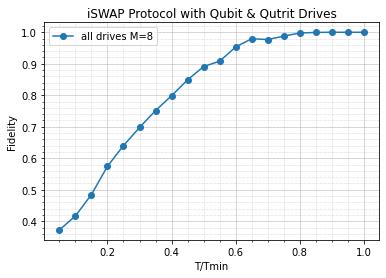

In [8]:
iSWAP_M8_all = pd.read_csv("../ML_Output/Qutrit_iSWAP_iSWAP_Protocol_M8_all_g1.csv",names=["fidelity","time"])
iSWAP_M8_all.sort_values(by="time",inplace=True)
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",iSWAP_M8_all,["all drives M=8"])

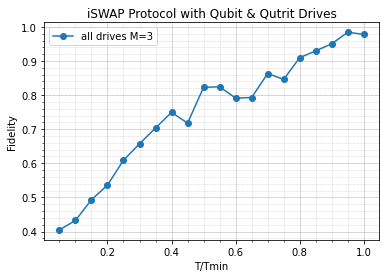

In [9]:
iSWAP_M3_all = pd.read_csv("../Data/iSWAP_Protocol/all.csv",names=["fidelity","time"])
iSWAP_M3_all.sort_values(by="time",inplace=True)
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",iSWAP_M3_all,["all drives M=3"])

Comparing the two we have

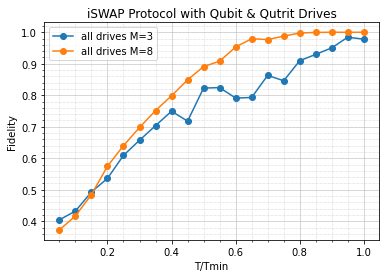

In [10]:
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",iSWAP_M3_all,["all drives M=3"])
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",iSWAP_M8_all,["all drives M=3","all drives M=8"])

Comparing this to the qutrit only drives, we have 

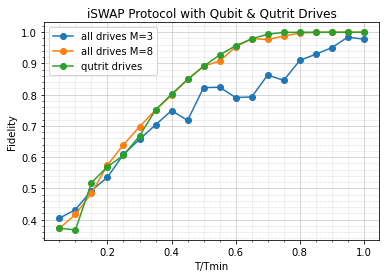

In [11]:
qutrits_DF = pd.read_csv("../ML_Output/Qutrit_iSWAP_iSWAP_Protocol_M8_qtd_g1.csv",names=["fidelity","time"])
qutrits_DF.sort_values(by="time",inplace=True)
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",iSWAP_M3_all,["all drives M=3"])
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",iSWAP_M8_all,["all drives M=3","all drives M=8"])
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",qutrits_DF,["all drives M=3","all drives M=8","qutrit drives"])
#plt.savefig(os.path.join(os.getcwd(),"Figures/","iSWAP_SaturSpeedUp.pdf"), format="pdf")

Here we see the saturation of the protocol for both the qutrit and combined drive systems. Note that this only occurs when the segment number is high $(M \geq 8)$. This is a little troubling as the combined protocol should reduce to the qutrit drives with all the qubit drives equal to zero. However, it seems as though the optimizer does not find this solution, and rather finds solutions where the qubit drives destructively interfere. 

## $CNOT$ Speed-Up Protocol

Now we will look at whether we can either a $\sqrt{2}$ speed-up for the $CNOT$ gate. Using the coupling matrix described in the latex document, we have the followin data. 

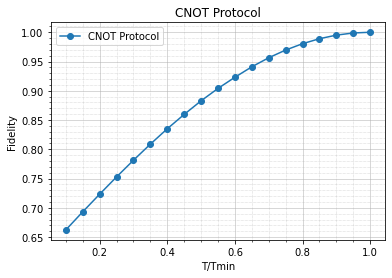

In [12]:
CNOT_PDF = pd.read_csv("../ML_Output/Qutrit_CNOT_CNOT_Protocol_M8_all_g1.csv",names=["fidelity","time"])
CNOT_PDF.sort_values(by="time",inplace=True)
CNOT_PDF = CNOT_PDF.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Protocol",CNOT_PDF,["CNOT Protocol"])

Here we see a saturation of the speed limit, but it seems as though there is no speed-up. But lets compare this to the classic $CNOT$ qubit protocol.

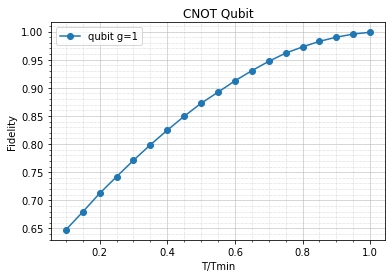

In [13]:
CNOT_DF = pd.read_csv("../Data/CNOT_Qubit/CNOT/CNOT_Qubit.csv",names=["fidelity","time"])
CNOT_DF.sort_values(by="time",inplace=True)
CNOT_DF = CNOT_DF.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Qubit",CNOT_DF,["qubit g=1"])

Graphing the two, we have

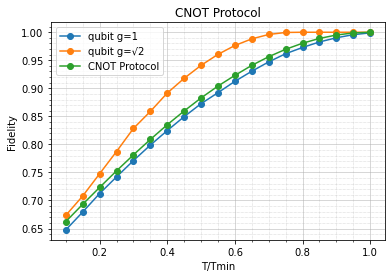

In [14]:
CNOT_R2 = pd.read_csv("../ML_Output/Qubit_CNOT_XX_M8_all_g1.41421.csv",names=["fidelity","time"])
CNOT_R2.sort_values(by="time",inplace=True)
CNOT_R2 = CNOT_R2.reset_index().drop('index',axis=1).drop(index=[0])

genPlot("CNOT Protocol",CNOT_DF,["CNOT Protocol"])
genPlot("CNOT Qubit",CNOT_R2,["qubit g=\u221a"])
genPlot("CNOT Protocol",CNOT_PDF,["qubit g=1","qubit g=\u221A2","CNOT Protocol"])
#plt.savefig(os.path.join(os.getcwd(),"Figures/","CNOT_noSpeedUp.pdf"), format="pdf")

While there is a slight speed up, this is no where near the $\sqrt{2}$ speed up expected. Now let's try the different coupling matrix mentioned in the latex document. 

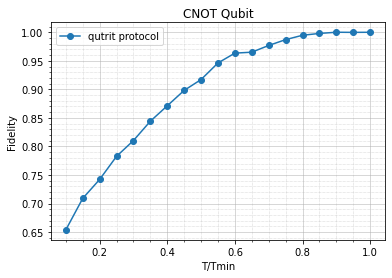

In [15]:
CNOT_DF2 = pd.read_csv("../ML_Output/Qutrit_CNOT_CNOT_Protocol2_M8_all_g1.csv",names=["fidelity","time"])
CNOT_DF2.sort_values(by="time",inplace=True)
CNOT_DF2 = CNOT_DF2.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Qubit",CNOT_DF2,["qutrit protocol"])

Now this is with both qutrit and qubit drives. Let's look at the case where there are only qutrit drives. 

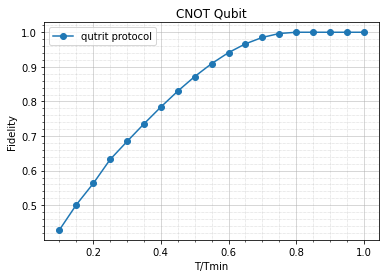

In [16]:
CNOT_QDF2 = pd.read_csv("../ML_Output/Qutrit_CNOT_CNOT_Protocol2_M8_qtd_g1.csv",names=["fidelity","time"])
CNOT_QDF2.sort_values(by="time",inplace=True)
CNOT_QDF2 = CNOT_QDF2.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Qubit",CNOT_QDF2,["qutrit protocol"])

This shows a stronger convergence than the with both the qutrits and qubit drives. Now let's compare this to the traditional $CNOT$ curves. 

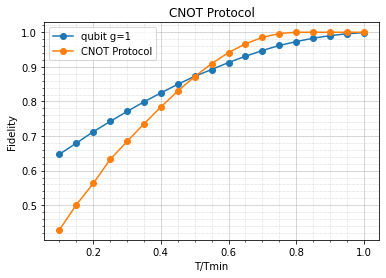

In [17]:
genPlot("CNOT Protocol",CNOT_DF,["qubit g=1"])
genPlot("CNOT Protocol",CNOT_QDF2,["qubit g=1","CNOT Protocol"])

While this protocol's behavior is a little odd (starting at a significantly lower fidelity than the qubit numerics), we do see a speed-up on the fidelity. Comparing this to the qubit numerics with $g=\sqrt{2}$, we have 

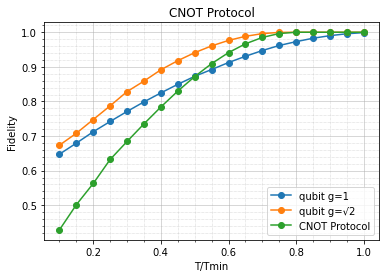

In [18]:
genPlot("CNOT Protocol",CNOT_DF,["qubit g=1"])
genPlot("CNOT Qubit",CNOT_R2,["qubit g=\u221a"])
genPlot("CNOT Protocol",CNOT_QDF2,["qubit g=1","qubit g=\u221A2","CNOT Protocol"])
#plt.savefig(os.path.join(os.getcwd(),"Figures/","CNOT_SpeedUp.pdf"), format="pdf")

Here we see a speed-up of the $CNOT$ protocol for $T_{min} > 0.5$. This is a little puzzling, as there is no inuitive reason why this protocol would only provide a speed-up past a respective time. However, it is reassuring that some type of speed-up is achieved. This behavior may be an artifact from having a low segment count. Increasing the segment count to $16$, we have 

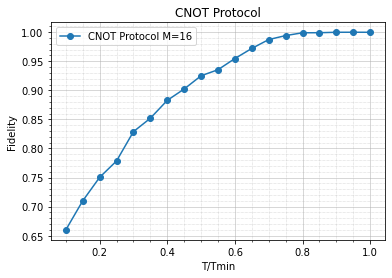

In [23]:
CNOT_DF16 = pd.read_csv("../ML_Output/Qutrit_CNOT_CNOT_Protocol2_M16_all_g1.0.csv",names=["fidelity","time"])
CNOT_DF16.sort_values(by="time",inplace=True)
CNOT_DF16 = CNOT_DF16.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Protocol",CNOT_DF16,["CNOT Protocol M=16"])

and comparing this to our previous graphs, we have

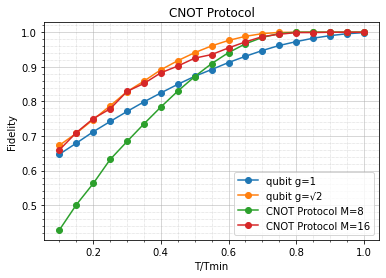

In [24]:
genPlot("CNOT Protocol",CNOT_DF,["qubit g=1"])
genPlot("CNOT Qubit",CNOT_R2,["qubit g=\u221a"])
genPlot("CNOT Protocol",CNOT_QDF2,["qubit g=1","qubit g=\u221A2","CNOT Protocol M=8"])
genPlot("CNOT Protocol",CNOT_DF16,["qubit g=1","qubit g=\u221A2","CNOT Protocol M=8","CNOT Protocol M=16"])
#plt.savefig(os.path.join(os.getcwd(),"Figures/","CNOT_SpeedUp.pdf"), format="pdf")

Here we see that the $CNOT$ Protocol now nearly saturates the $g=\sqrt{2}$ qubit numerics. Increasing the segment count further will likely fully saturate the curve. It is suprising that a full saturation takes significantly more segments when compared to the $iSWAP$ protocol. This may be an artifact of the optimizer such that is is more difficult to find solutions for this protocol. 

Looking at an optimization with 32 segments, we have 

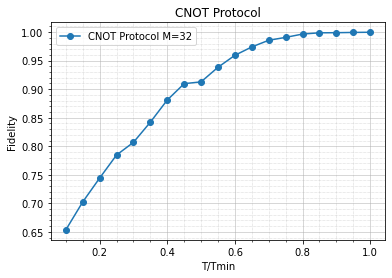

In [27]:
CNOT_DF32 = pd.read_csv("../ML_Output/Qutrit_CNOT_CNOT_Protocol2_M32_all_g1.0.csv",names=["fidelity","time"])
CNOT_DF32.sort_values(by="time",inplace=True)
CNOT_DF32 = CNOT_DF32.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Protocol",CNOT_DF32,["CNOT Protocol M=32"])

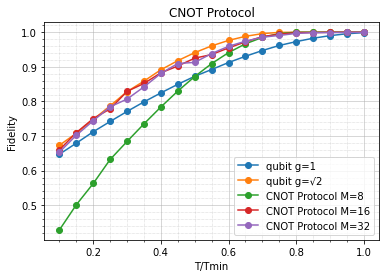

In [28]:
genPlot("CNOT Protocol",CNOT_DF,["qubit g=1"])
genPlot("CNOT Qubit",CNOT_R2,["qubit g=\u221a"])
genPlot("CNOT Protocol",CNOT_QDF2,["qubit g=1","qubit g=\u221A2","CNOT Protocol M=8"])
genPlot("CNOT Protocol",CNOT_DF16,["qubit g=1","qubit g=\u221A2","CNOT Protocol M=8","CNOT Protocol M=16"])
genPlot("CNOT Protocol",CNOT_DF32,["qubit g=1","qubit g=\u221A2","CNOT Protocol M=8","CNOT Protocol M=16","CNOT Protocol M=32"])
#plt.savefig(os.path.join(os.getcwd(),"Figures/","CNOT_SpeedUp.pdf"), format="pdf")

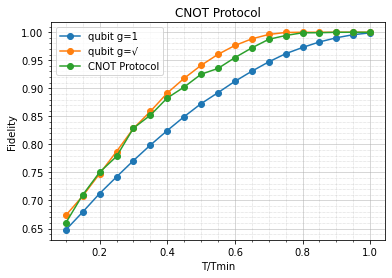

In [30]:
genPlot("CNOT Protocol",CNOT_DF,["qubit g=1"])
genPlot("CNOT Qubit",CNOT_R2,["qubit g=\u221a"])
genPlot("CNOT Protocol",CNOT_DF16,["qubit g=1","qubit g=\u221a","CNOT Protocol"])

## Naive Diagonal Entry Analysis

Here we will explore whether a coupling matrix with diagonal entries will induce constructive interference and thus a speed-up. Here we will look at the coupling matrix with all ones on the off-diagonal. It can be assumed that this matrix can be generated by having a Hadamard-like gate act on a diagonal matrix, similar to the transformation from $X\to Z$ for qubits. Note that there may be different off-diagonal and diagonal matrix that may result in a speed-up, but testing this for $CNOT$ and $SWAP$ gates, we have

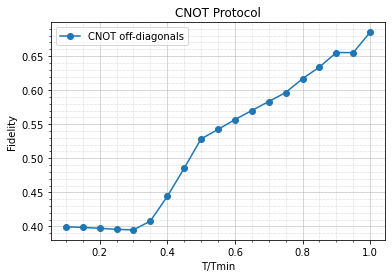

In [25]:
CNOT_OFF = pd.read_csv("../ML_Output/Qutrit_CNOT_allX_M8_qtd_g1.0.csv",names=["fidelity","time"])
CNOT_OFF.sort_values(by="time",inplace=True)
CNOT_OFF = CNOT_OFF.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Off-Diagonals",CNOT_OFF,["CNOT off-diagonals"])

This is quite a poor-result from our numerics. First, the $T_{min}$ must be incorrect and the convergence is non-smooth. Testing this for $iSWAP$ we have

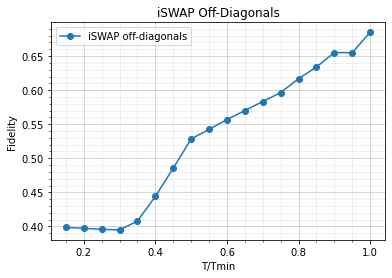

In [26]:
ISWAP_OFF = pd.read_csv("../ML_Output/Qutrit_iSWAP_allX_M8_qtd_g1.0.csv",names=["fidelity","time"])
ISWAP_OFF.sort_values(by="time",inplace=True)
ISWAP_OFF = CNOT_OFF.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("iSWAP Off-Diagonals",ISWAP_OFF,["iSWAP off-diagonals"])

This is the exact same result as the $CNOT$. 